In [1]:
import sys                       
sys.path.append('../scripts/')
from ideal_robot import *
from scipy.stats import expon, norm ###spike_noise_header###

In [2]:
class Robot(IdealRobot):   ###spike_noise###

    def __init__(self, pose, agent=None, sensor=None, color="black",
                 noise_per_meter=5, noise_std=math.pi/60):  #追加
        super().__init__(pose, agent, sensor, color)
        self.noise_pdf = expon(scale=1.0/(1e-100 + noise_per_meter))
        self.distance_until_noise = self.noise_pdf.rvs()
        self.theta_noise = norm(scale=noise_std)
        
    def noise(self, pose, nu, time_interval): #メソッド追加
        self.distance_until_noise -= nu*time_interval
        if self.distance_until_noise <= 0.0:
            self.distance_until_noise += self.noise_pdf.rvs()
            pose[2] += self.theta_noise.rvs()
            
        return pose

    def one_step(self, time_interval):
        if not self.agent: return
        nu, omega = self.agent.decision()
        self.pose = self.func_state_transition(nu, omega, time_interval, self.pose)
        self.pose = self.noise(self.pose, nu, time_interval) #追加
        if self.sensor: self.sensor.data(self.pose)

<IPython.core.display.Javascript object>


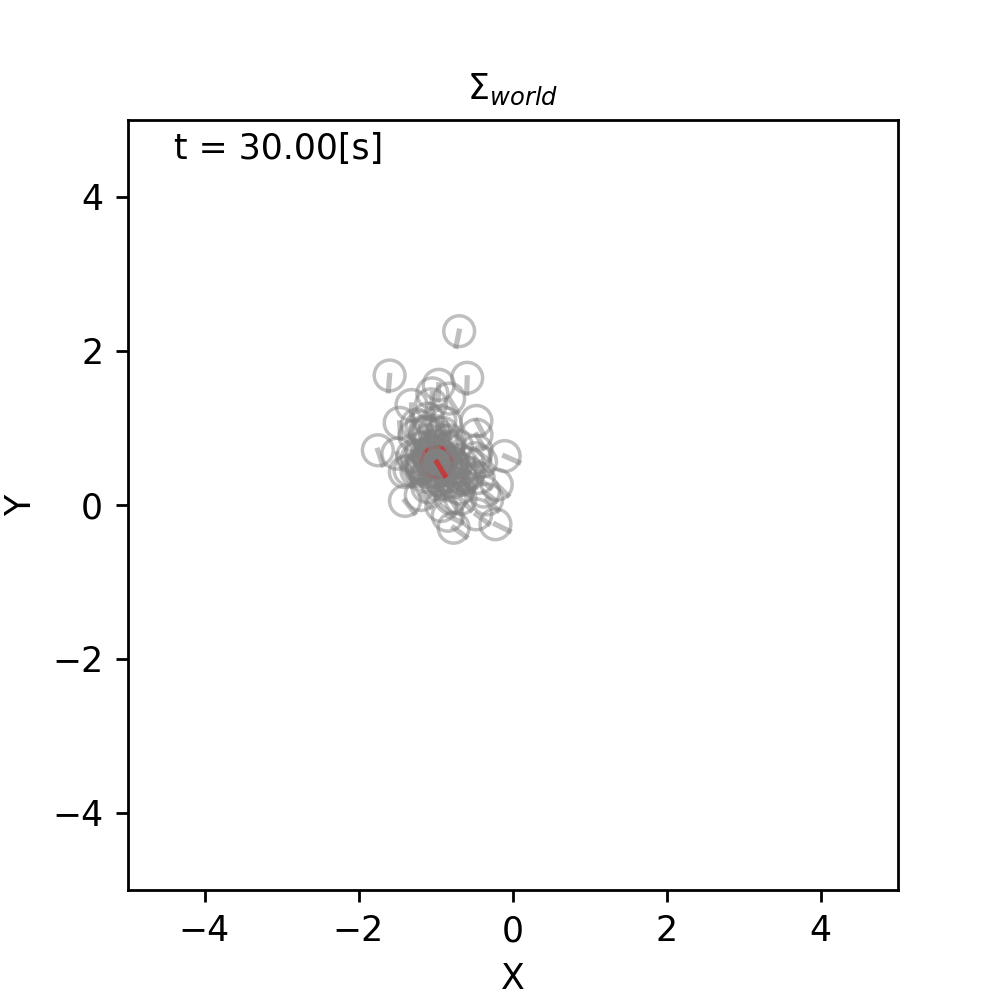

In [3]:
world = World(30, 0.1)   ###draw_spike_noise###

for i in range(100):
    circling = Agent(0.2, 10.0/180*math.pi)
    r = Robot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="gray" )  #灰色を指定
    world.append(r)
    
r = IdealRobot( np.array([0, 0, 0]).T, sensor=None, agent=circling, color="red" )  #IdealRobotのオブジェクトを作って赤色を指定
world.append(r)

world.draw()